## Multiple Polynomial Regression

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

### Define Dataset

In [33]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response = requests.get(url)

with open("FuelConsumptionCo2.csv", "wb") as fout:
    fout.write(response.content)

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### Preprocessing

In [35]:
cdf = df[["VEHICLECLASS", "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,COMPACT,2.0,4,8.5,196
1,COMPACT,2.4,4,9.6,221
2,COMPACT,1.5,4,5.9,136
3,SUV - SMALL,3.5,6,11.1,255
4,SUV - SMALL,3.5,6,10.6,244


In [36]:
cdf = cdf.copy()

mean_co2emission = cdf.groupby("VEHICLECLASS")["CO2EMISSIONS"].mean()
cdf["VEHICLECLASS_encoded"] = cdf["VEHICLECLASS"].map(mean_co2emission)

cdf.drop("VEHICLECLASS", axis=1, inplace=True)
cdf.head(0)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,VEHICLECLASS_encoded


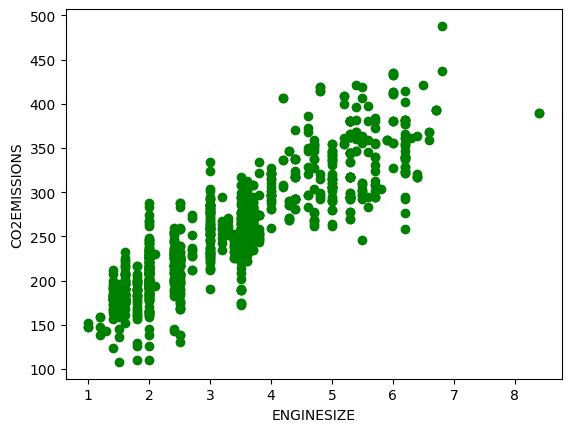

In [37]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color="green")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

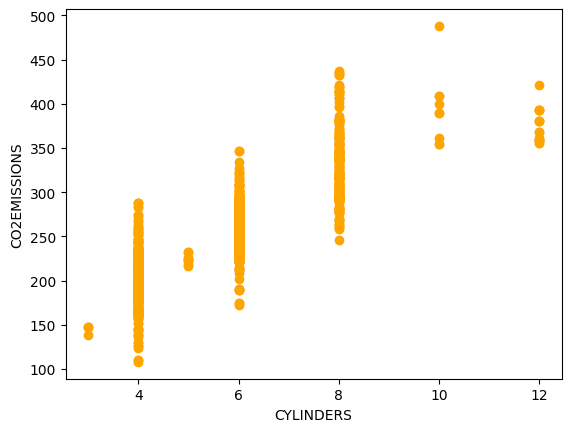

In [38]:
plt.scatter(cdf["CYLINDERS"], cdf["CO2EMISSIONS"], color="orange")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

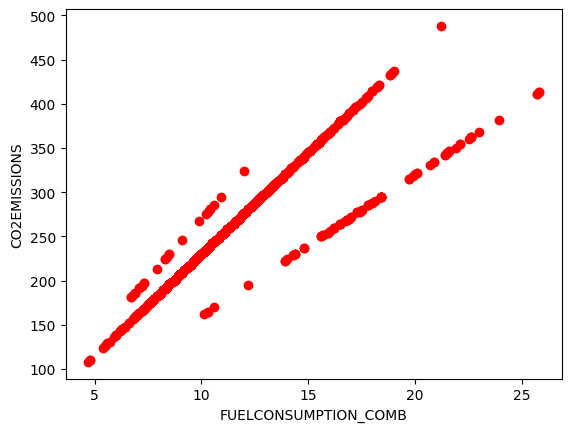

In [39]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"], color="red")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

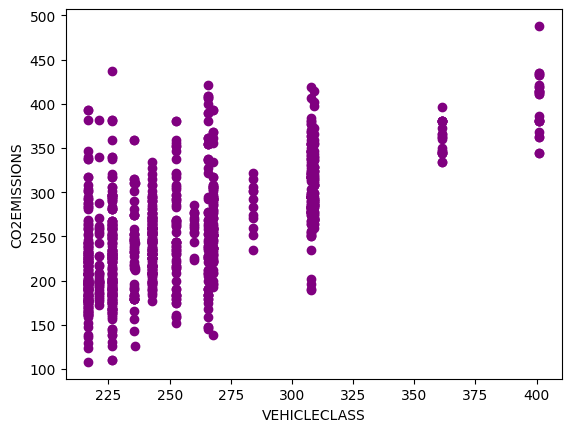

In [40]:
plt.scatter(cdf["VEHICLECLASS_encoded"], cdf["CO2EMISSIONS"], color="purple")
plt.xlabel("VEHICLECLASS")
plt.ylabel("CO2EMISSIONS")
plt.show()

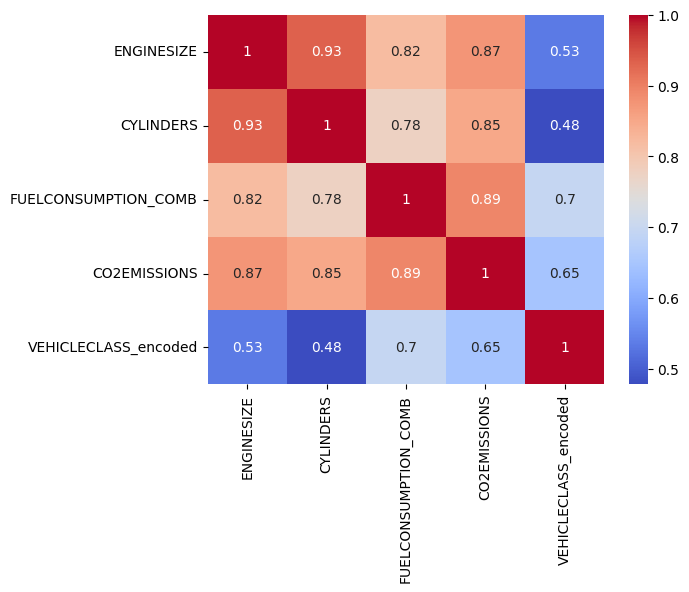

In [41]:
corr = cdf.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [42]:
msk = np.random.rand(len(df)) < 0.8

train, test = cdf[msk], cdf[~msk]

train.shape, test.shape

((856, 5), (211, 5))

### Model Definition

In [43]:
x_train = np.asanyarray(train[["VEHICLECLASS_encoded", "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["VEHICLECLASS_encoded", "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [45]:
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)

In [49]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Evaluation

In [50]:
from sklearn.metrics import r2_score

x_test_poly = poly.transform(x_test)
y_pred = mymodel.predict(x_test_poly)

In [51]:
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"mean squared error : {mse:.5f} | mean absolute error : {mae:.5f} | r2 score : {r2:.5f}".title())

Mean Squared Error : 203.29756 | Mean Absolute Error : 8.70367 | R2 Score : 0.94101
